# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Visualization & EDA
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Preprocessing & Utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Deep Learning (Optional for Advanced Users)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# MLflow for Experiment Tracking
import mlflow
import mlflow.sklearn

# DVC (Data Version Control)
# Note: Used via CLI, not directly imported in Python.

# Deployment (FastAPI for serving)
from fastapi import FastAPI
import uvicorn
import joblib
import json

# Monitoring Tools (Prometheus Exporter)
from prometheus_client import start_http_server, Summary, Gauge
import random
import time

# OS and Utilities
import os
import sys
import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
hr=pd.read_csv('heart.csv')
hr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Mendefinisikan deskripsi kolom dataset dalam bentuk list of dicts

In [4]:
# Definisikan deskripsi kolom dataset dalam bentuk list of dicts
column_descriptions = [
    {"No": 1, "Kolom": "Age", "Tipe Data": "int64", "Deskripsi": "Usia pasien (dalam tahun)"},
    {"No": 2, "Kolom": "Sex", "Tipe Data": "object", "Deskripsi": "Jenis kelamin pasien (M, F)"},
    {"No": 3, "Kolom": "ChestPainType", "Tipe Data": "object", "Deskripsi": "Jenis nyeri dada (ATA, NAP, ASY, TA)"},
    {"No": 4, "Kolom": "RestingBP", "Tipe Data": "int64", "Deskripsi": "Tekanan darah saat istirahat (mm Hg)"},
    {"No": 5, "Kolom": "Cholesterol", "Tipe Data": "int64", "Deskripsi": "Kadar kolesterol darah (mg/dl)"},
    {"No": 6, "Kolom": "FastingBS", "Tipe Data": "int64", "Deskripsi": "Gula darah puasa >120 mg/dl (1 = ya, 0 = tidak)"},
    {"No": 7, "Kolom": "RestingECG", "Tipe Data": "object", "Deskripsi": "Hasil EKG saat istirahat (Normal, ST, LVH)"},
    {"No": 8, "Kolom": "MaxHR", "Tipe Data": "int64", "Deskripsi": "Denyut jantung maksimum saat uji latihan"},
    {"No": 9, "Kolom": "ExerciseAngina", "Tipe Data": "object", "Deskripsi": "Apakah mengalami angina saat latihan (Y, N)"},
    {"No": 10, "Kolom": "Oldpeak", "Tipe Data": "float64", "Deskripsi": "Penurunan segmen ST pada EKG (mm)"},
    {"No": 11, "Kolom": "ST_Slope", "Tipe Data": "object", "Deskripsi": "Kemiringan segmen ST pada EKG (Up, Flat, Down)"},
    {"No": 12, "Kolom": "HeartDisease", "Tipe Data": "int64", "Deskripsi": "Apakah pasien memiliki penyakit jantung (1 = ya, 0 = tidak)"}
]

# Buat DataFrame dari deskripsi
df_description = pd.DataFrame(column_descriptions)
df_description.style.set_properties(**{'text-align': 'left'})  # Tampilkan tabel dengan alignment yang rapi



,No,Kolom,Tipe Data,Deskripsi
0,1,Age,int64,Usia pasien (dalam tahun)
1,2,Sex,object,"Jenis kelamin pasien (M, F)"
2,3,ChestPainType,object,"Jenis nyeri dada (ATA, NAP, ASY, TA)"
3,4,RestingBP,int64,Tekanan darah saat istirahat (mm Hg)
4,5,Cholesterol,int64,Kadar kolesterol darah (mg/dl)
5,6,FastingBS,int64,"Gula darah puasa >120 mg/dl (1 = ya, 0 = tidak)"
6,7,RestingECG,object,"Hasil EKG saat istirahat (Normal, ST, LVH)"
7,8,MaxHR,int64,Denyut jantung maksimum saat uji latihan
8,9,ExerciseAngina,object,"Apakah mengalami angina saat latihan (Y, N)"
9,10,Oldpeak,float64,Penurunan segmen ST pada EKG (mm)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## a. Missing Values

In [5]:
# Cek Missing Values
print("Jumlah Missing Values per Kolom:")
print(hr.isnull().sum())

Jumlah Missing Values per Kolom:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## b. Statistik Deskriptif

In [6]:
hr.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


## c. Distribusi Fitur

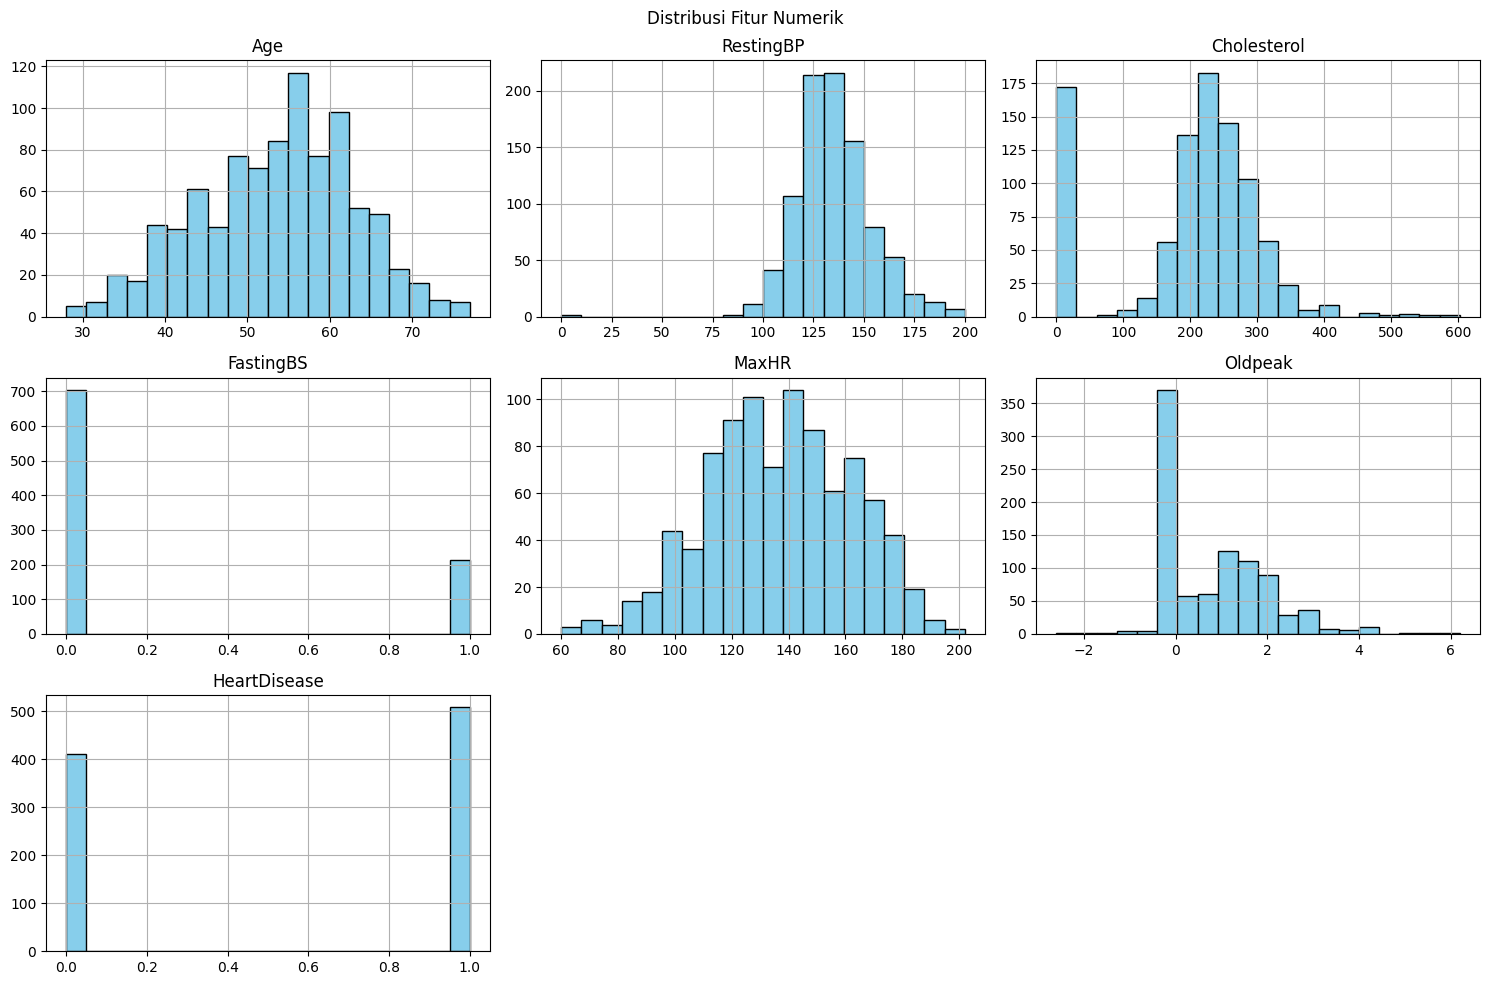

In [7]:
# Histogram Seluruh Kolom Numerik
hr.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()

## d. Korelasi

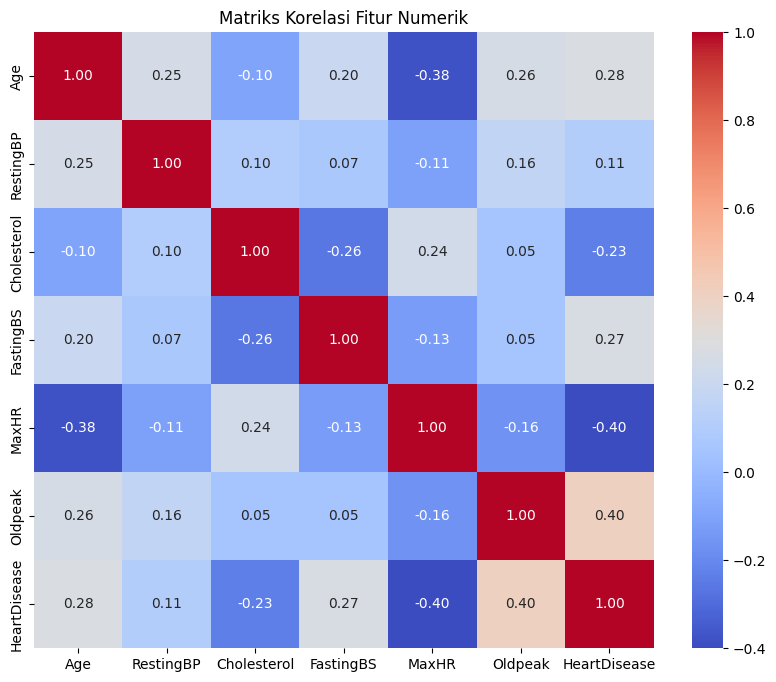

In [8]:
# Korelasi Pearson antar fitur numerik
plt.figure(figsize=(10, 8))
numerik_hr = hr.select_dtypes(include=['number'])  # Ambil hanya kolom numerik
sns.heatmap(numerik_hr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()


## e. Visualisasi target variable

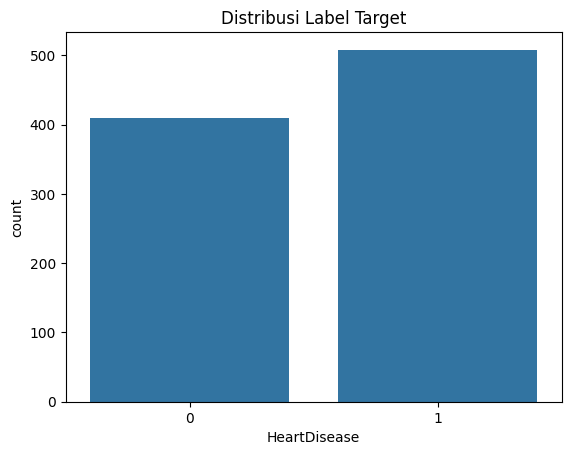

In [9]:
# Visualisasi target variable
if 'HeartDisease' in hr.columns:
    sns.countplot(data=hr, x='HeartDisease')
    plt.title("Distribusi Label Target")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [10]:
# Tidak ada data yang kosong sesuai pengecekan 

## 2. Menghapus Data Duplikat

In [11]:
# Duplicate Check
duplicates = hr.duplicated().sum()
print(f"Jumlah Duplikasi: {duplicates}")

# Drop Duplikasi jika ada
if duplicates > 0:
    hr = hr.drop_duplicates()

# Cek kembali
print(f"Shape Setelah Bersih: {hr.shape}")

Jumlah Duplikasi: 0
Shape Setelah Bersih: (918, 12)


## 3. Pemisahan Features dan Target & Identifikasi kolom numerik dan kategorikal

In [12]:
X = hr.drop('HeartDisease', axis=1)
y = hr['HeartDisease']

In [13]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Fitur Numerik:", num_cols)
print("Fitur Kategorikal:", cat_cols)

Fitur Numerik: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Fitur Kategorikal: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


## 5. Membuat Pipeline

In [14]:
# Numeric Pipeline
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Full Preprocessing Pipeline
prep = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

In [15]:
# Atau bisa juga dengan kode:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), num_cols)
    ])

## 6. Splitting Data

In [16]:
# Transform the Data
X_processed = prep.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## 7. Save the processed datasets

In [17]:
heart_preprocessing = "heart_preprocessing"

os.makedirs(heart_preprocessing, exist_ok=True)
np.save(os.path.join(heart_preprocessing, 'X_train.npy'), X_train)
np.save(os.path.join(heart_preprocessing, 'X_test.npy'), X_test)
np.save(os.path.join(heart_preprocessing, 'y_train.npy'), y_train)
np.save(os.path.join(heart_preprocessing, 'y_test.npy'), y_test)

# Save the preprocessing pipeline
joblib.dump(prep, os.path.join(heart_preprocessing, 'preprocessing_pipeline.pkl'))

print("Preprocessing otomatis selesai dan data berhasil disimpan.")

Preprocessing otomatis selesai dan data berhasil disimpan.
